Python Data Wrangling Assignment

First, the necessary libraries are imported.
Two methods to load data from a csv file as well as save data to a csv file are defined, including logging and error handling. 

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import logging

logging.basicConfig(filename='data_wrangling.log', level=logging.INFO,
                    format='%(asctime)s - %(levelname)s - %(message)s')

def load_data(file_name):
    try:
        data = pd.read_csv(file_name)
        logging.info(f"{file_name} has been loaded successfully.")
        if 'Date' in data.columns:
            data['Date'] = pd.to_datetime(data['Date'])
        return data
    except FileNotFoundError:
        print("File not found. Please check the file name and try again.")
        logging.error("The file was not found.")
        return None
    
def save_data(data, file_name, headers = None):
    try: 
        if isinstance(data, pd.DataFrame):
            data.to_csv(file_name, mode="w", index=False)
        elif isinstance(data, list):
            with open(file_name, "w") as f:
                if headers is not None:
                    f.write("%s\n" % headers)  # Write the headers
                for item in data:
                    f.write("%s\n" % item)
        logging.info(f"The data has been saved successfully to {file_name}.")
    except FileNotFoundError:
        print("File not found. Please check the file name and try again.")
        logging.error("The file was not found.")
    except Exception:
        if not data:
            print("The variable is empty.")
            logging.warning("The variable is empty.")

The Dataframe is loaded and the first 10 rows are displayed, as well as the type of the columns.
In the next step, all duplicates in the file are removed.

In [14]:
data = load_data('visit_data.csv') #uses the load_data function to load the data

print(data.head(10)) #prints the first 10 rows of the data

print(data.dtypes) #shows the data types of each column

try: 
  if not data.empty:
    data = data.drop_duplicates() #drops all the duplicates
    logging.info("Duplicates have been dropped successfully.")
  else:
    print("The dataframe is empty.")
    logging.warning("The dataframe is empty.")
except:
  print("No duplicates found.")


            Patient     Visit_Reason       Date  Visit_Duration
0       David Moore            Cough 2022-01-05              17
1       Ivy Johnson           Injury 2022-10-20              51
2     Hannah Miller         Headache 2022-08-24              25
3        Ivy Wilson          Allergy 2022-08-25              26
4  Charlie Williams  Routine Checkup 2022-10-27              25
5     Charlie Davis           Injury 2022-05-20              39
6        Ivy Miller         Headache 2022-02-20              16
7         Ivy Smith           Injury 2022-11-07              57
8        Jack Moore            Cough 2022-07-14              22
9         Bob Davis            Fever 2022-01-20              30
Patient                   object
Visit_Reason              object
Date              datetime64[ns]
Visit_Duration             int64
dtype: object


Next, a list is created containing all the reasons for a visit to the doctor, as well as the number of visits per reason. 
The list is printed to ascertain that it is correctly filled.


In [15]:
visit_reason_list = data.Visit_Reason.value_counts()
print(visit_reason_list)


Headache           1723
Allergy            1679
Routine Checkup    1673
Injury             1664
Cough              1635
Fever              1610
Name: Visit_Reason, dtype: int64


This code iterates on the elements in the list and creates a string containing the name, number of visits, mean, maximum and minimum duration for each visit reason.
This string is then appended to a list.

In [16]:
calculated_list = []
for sickness, visits in visit_reason_list.items():
    mask = data.Visit_Reason == sickness 
    mean_sickness = data.loc[mask, 'Visit_Duration'].mean().round(decimals=1)
    max_sickness = data.loc[mask, 'Visit_Duration'].max()
    min_sickness = data.loc[mask, 'Visit_Duration'].min()
    row_sickness= ','.join([str(sickness),str(visits),str(mean_sickness),str(max_sickness),str(min_sickness)])
    calculated_list.append(row_sickness)

In the next step, the list is saved in a csv file named calculations.csv. Because it is a list and not a dataframe, the header is included for the function so we will be able to call on the columns later on. 

In [17]:
save_data(calculated_list, "calculations.csv","Visit_Reason,Visits,Mean_Duration,Max_Duration,Min_Duration") #saves the calculated list to a csv file

In this step, a bar plot is created using the seaborn library. The rows are grouped by reason of visit and a mean is calculated for each reason. 

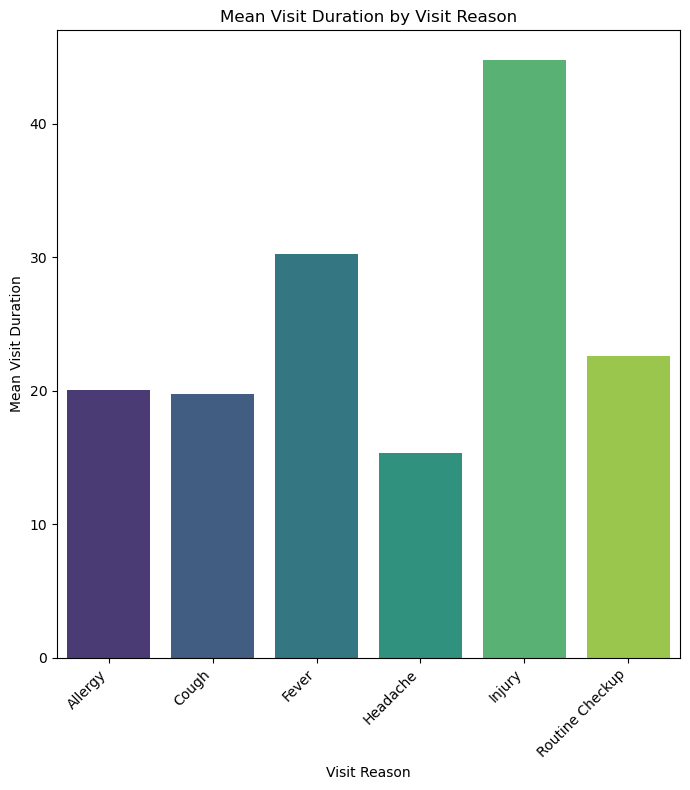

In [18]:
mean_durations = data.groupby('Visit_Reason')['Visit_Duration'].mean().reset_index()

# Set up the plot
plt.figure(figsize=(7, 8))
sns.barplot(x='Visit_Reason', y='Visit_Duration', data=mean_durations, palette='viridis')

# Adding labels and title
plt.xlabel('Visit Reason')
plt.ylabel('Mean Visit Duration')
plt.title('Mean Visit Duration by Visit Reason')

plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

In the next step, a box plot is created, showing the range, median as well as 75% percentile of minutes needed per visit for each reason.

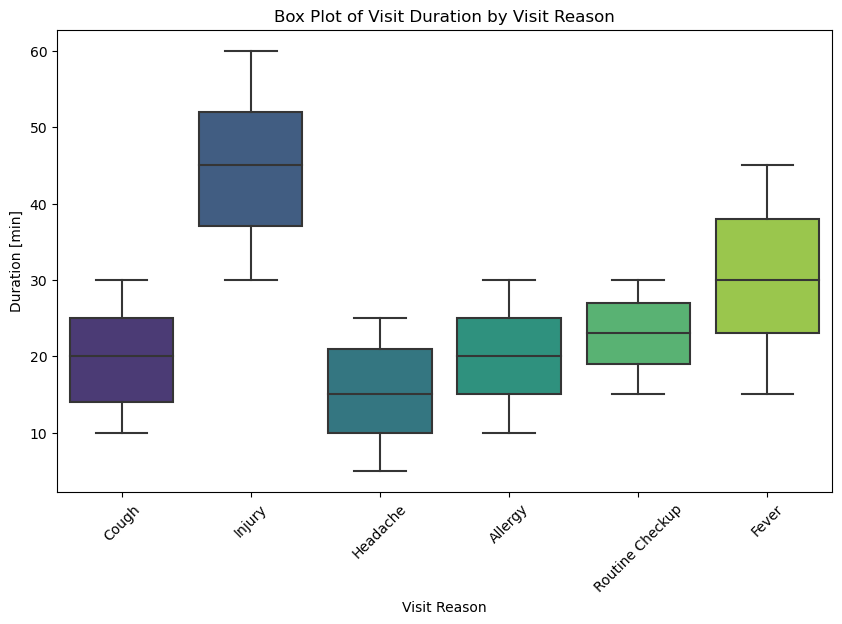

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Visit_Reason', y='Visit_Duration', palette="viridis")
plt.title('Box Plot of Visit Duration by Visit Reason')
plt.xlabel('Visit Reason')
plt.ylabel('Duration [min]')
plt.xticks(rotation=45)
plt.show()


In the next graph, the data from the calculations.csv file is displayed, comparing the minimum, maximum and mean duration of each reason of visit. To achieve this, the data from the file is saved in the calculated_data variable.

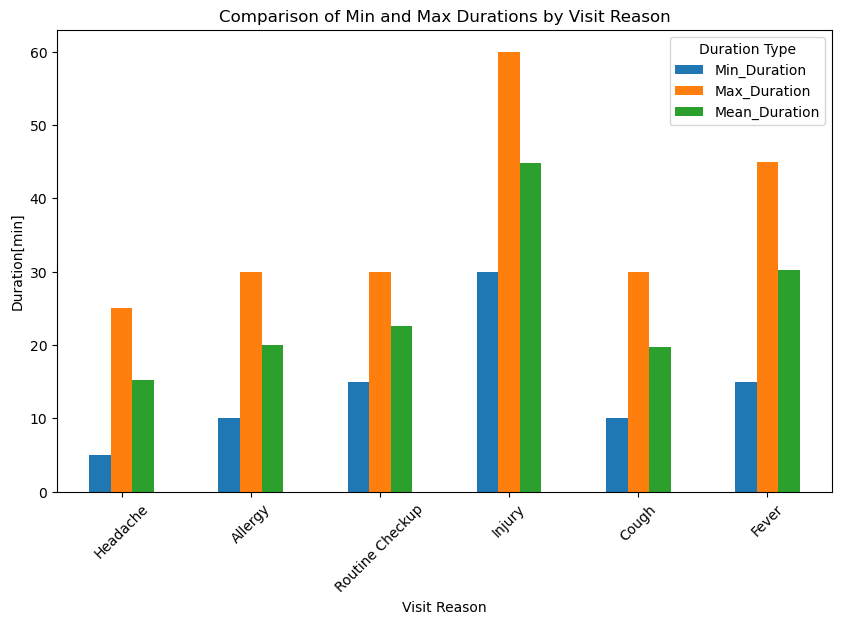

In [20]:
calculated_data = load_data('calculations.csv')

      
calculated_data.set_index('Visit_Reason', inplace=True)
fig, ax = plt.subplots(figsize=(10, 6))

calculated_data[['Min_Duration', 'Max_Duration',"Mean_Duration"]].plot(kind='bar', ax=ax)
plt.title('Comparison of Min and Max Durations by Visit Reason')
plt.xlabel('Visit Reason')
plt.ylabel('Duration[min]')
plt.xticks(rotation=45) 
plt.legend(title='Duration Type')
plt.show()

Another interesting aspect is how these visits were spread over time. Analysis of the dates shows, that the doctor was visited more than 10 times as often on the most visited day than on the least visited day. This divergence suggest that there is a big difference between some days and it would be interesting to find out whether there is a trend, for exaple a seasonal trend, visible. With that intent, a plot showing the distribution of the amount of visits to the doctor over time is generated. This graph suggests that throughout January 2022 a spike in visits to the doctor was visible. Apart from that, no clear trend was visible except for some fluctuation. 

        Date  Visit_Count
0 2022-01-12           74
1 2022-01-06           72
2 2022-01-23           70
3 2022-01-14           67
4 2022-01-07           64
          Date  Visit_Count
331 2022-06-26           10
332 2022-06-07           10
333 2022-06-15            9
334 2022-06-05            7
335 2022-06-08            7


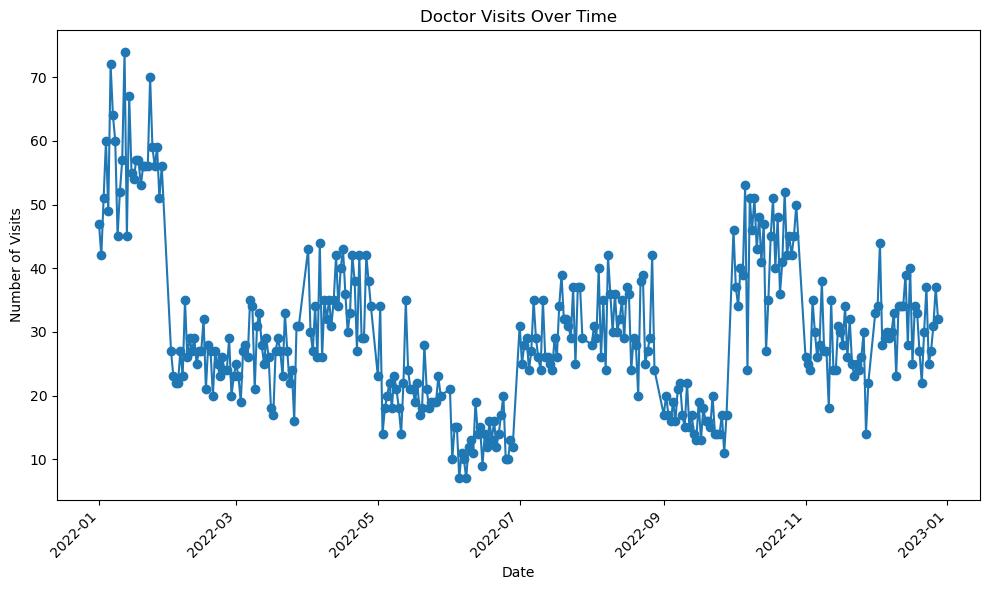

In [21]:
date_visit_counts = data['Date'].value_counts().reset_index()
date_visit_counts.columns = ['Date', 'Visit_Count']
print(date_visit_counts.head(5))
print(date_visit_counts.tail(5))


data['Date'] = pd.to_datetime(data['Date'])

# Group the data by the 'Date' column and count the occurrences
date_visit_counts = data.groupby('Date').size().reset_index(name='Visit_Count')

plt.figure(figsize=(10, 6))
plt.plot(date_visit_counts['Date'], date_visit_counts['Visit_Count'], marker='o')


plt.xlabel('Date')
plt.ylabel('Number of Visits')
plt.title('Doctor Visits Over Time')
plt.xticks(rotation=45, ha='right')


plt.tight_layout()
plt.show()

In the next step, it would be interesting to have this plot for each of the reasons, why a visit to the doctor occured. As visible in the plot below, it is not easily interpretable when all reasons are shown in the same lineplot.

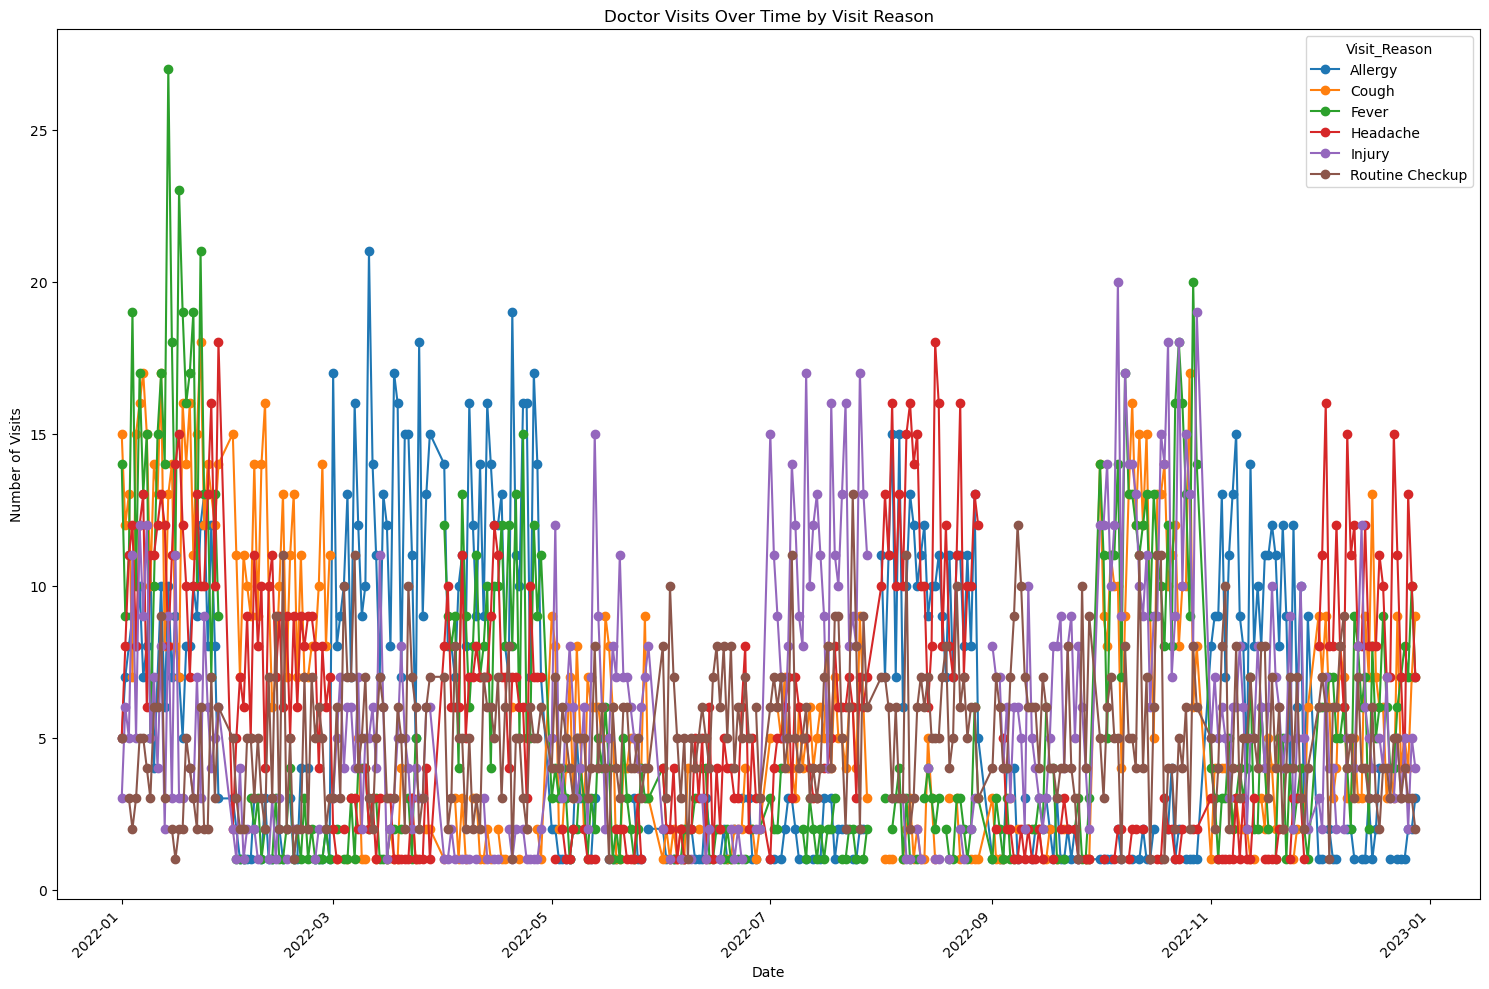

In [22]:
data['Date'] = pd.to_datetime(data['Date'])
date_reason_counts = data.groupby(['Date', 'Visit_Reason']).size().reset_index(name='Visit_Count')
pivot_data = date_reason_counts.pivot(index='Date', columns='Visit_Reason', values='Visit_Count')

plt.figure(figsize=(15, 10))
pivot_data.plot(marker='o', ax=plt.gca())

plt.xlabel('Date')
plt.ylabel('Number of Visits')
plt.title('Doctor Visits Over Time by Visit Reason')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

To have a clearer overview over this data, a line plot for each visit reason is displayed. The surge in doctor visits in january and october can be explained by the spike in visits for both Cough and Fever: Routine Checkups have only little fluctuation throughout the year, while Allergy shows a seasonality with several spikes during spring, summer and autumn. 

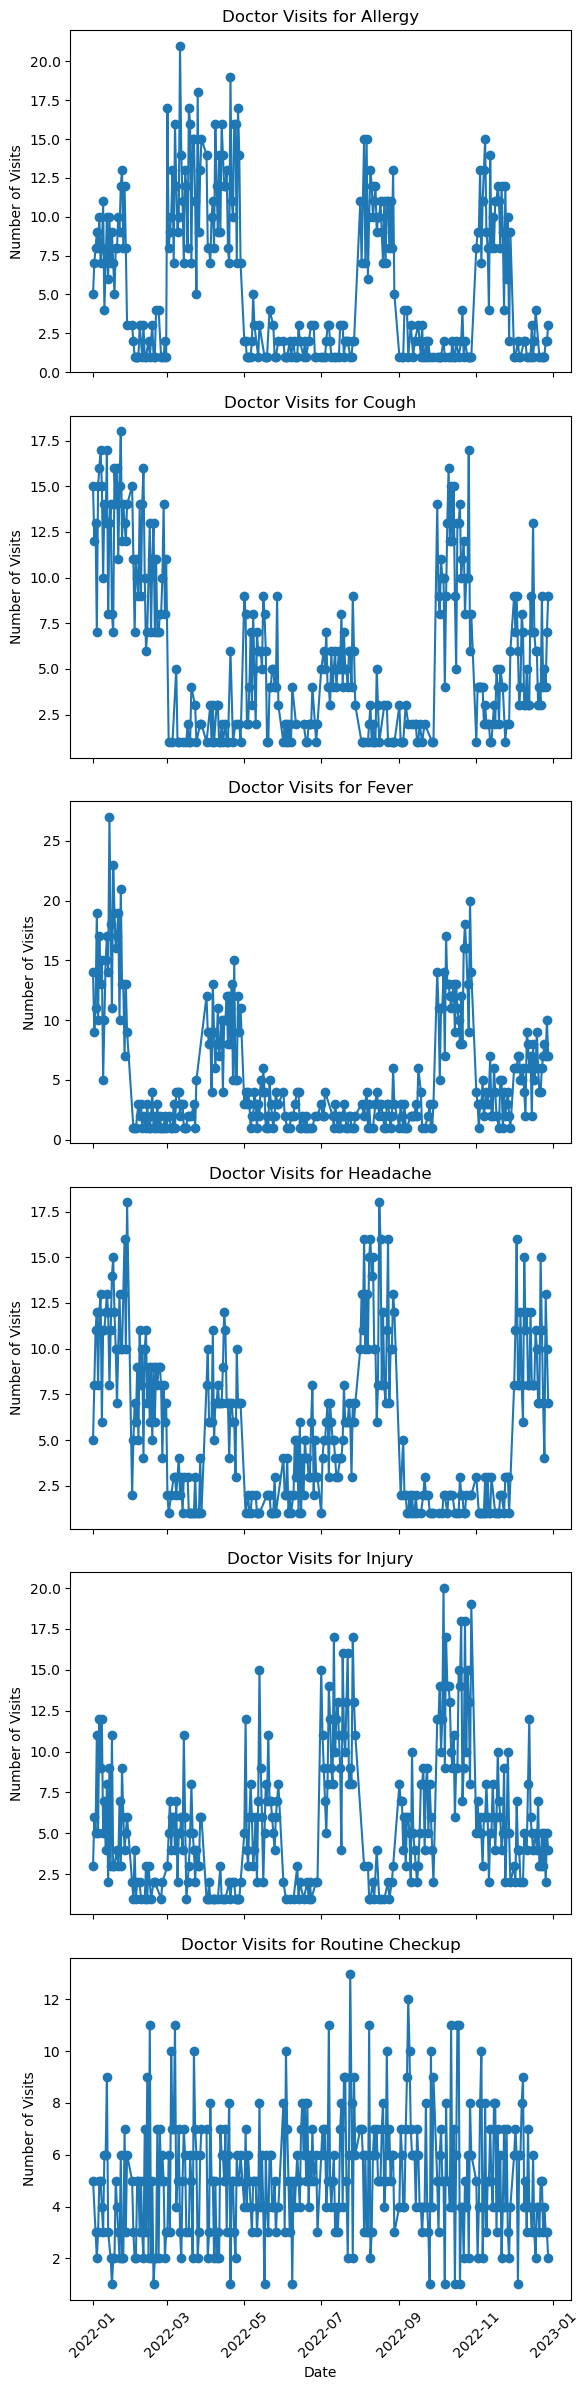

In [23]:
reason_counts = data.groupby('Visit_Reason').size()

fig, axes = plt.subplots(6, 1, figsize=(6, 4 * 6), sharex=True)

for idx, reason in enumerate("Allergy,Cough,Fever,Headache,Injury,Routine Checkup".split(",")):
    reason_data = data[data['Visit_Reason'] == reason]
    date_reason_counts = reason_data.groupby('Date').size().reset_index(name='Visit_Count')
 
    axes[idx].plot(date_reason_counts['Date'], date_reason_counts['Visit_Count'], marker='o')
    axes[idx].set_ylabel('Number of Visits')
    axes[idx].set_title(f'Doctor Visits for {reason}')
    axes[idx].tick_params(axis='x', rotation=45)

plt.xlabel('Date')
plt.tight_layout()
plt.show()

To gather absolute numbers of doctor visits per month in 2022, the data is filtered by month and added into a new dataframe, which is then displayed.

In [24]:
def filter_by_month(df, year, month):
    mask = (df['Date'].dt.year == year) & (df['Date'].dt.month == month)
    return df[mask]

monthly_visits = pd.DataFrame(columns=['Month', 'Visits'])
for month in range(1, 13):
    filtered_month = filter_by_month(data, 2022, month)
    monthly_visits.loc[month-1] = [month, len(filtered_month)]

monthly_visits.set_index('Month', inplace=True)
print(monthly_visits)


       Visits
Month        
1        1580
2         718
3         735
4         977
5         591
6         368
7         831
8         881
9         465
10       1199
11        757
12        882


In the next step, the busiest month is compared with the least busy. As previously stated, the month of january was very busy due to an increase in visits for almost all reasons (except Routine Checkups, making up only 6.4% of the visits), but especially due to a rise in Cough, Fever and Headache Patients. June was a relatively quiet month whith Routine Checkups being the main visit reason, with a percentage of 40%. 

In [25]:
filtered_january = filter_by_month(data, 2022, 1)
grouped_january = filtered_january.groupby('Visit_Reason').size()
filtered_june = filter_by_month(data, 2022, 6)
grouped_june = filtered_june.groupby('Visit_Reason').size()

print(grouped_january)
print(grouped_june)

Visit_Reason
Allergy            229
Cough              369
Fever              405
Headache           311
Injury             165
Routine Checkup    101
dtype: int64
Visit_Reason
Allergy             32
Cough               35
Fever               39
Headache            91
Injury              22
Routine Checkup    149
dtype: int64


Another interesting aspect is that there are patients who have visited the doctor more than once. First, the amount of times a patient visited the doctor is counted and the top 10 visitors are printed.

The Data is split and stacked, then grouped by the patient and reason.
Unfortunately, all patients have been to the doctor for all 6 of the visit reasons studied :P. This data is then saved to a new csv file using the predefined save_data method.

In [26]:
repeated_visits = data.Patient.value_counts()
print(repeated_visits.head(10))

data_by_visit_reason = (data['Visit_Reason'].str.split(', ')
                    .groupby(data['Patient'])
                    .agg(lambda x: ', '.join(set(y for z in x for y in z)))
                    .reset_index()) 

save_data(data_by_visit_reason, "patients_visit_reasons.csv")


Alice Smith        129
Jack Miller        121
David Smith        119
Bob Taylor         119
George Williams    115
Jack Taylor        115
Hannah Moore       114
Emma Johnson       113
Charlie Smith      113
Charlie Taylor     112
Name: Patient, dtype: int64


In the next step, it would be interesting to know which patient visited the doctor how often for what reason. To achieve this, the original dataframe is grouped by both the "Patients" and the "Visit Reason" column, counting the number of occurences of the combination of a name with the same reason. After sorting by the most visits due to the same reason, the 10 Patients who visited for the same reason most often are printed and the dataframe is saved to a csv file. 

In [27]:
# Count the occurrences of each visit reason for each patient
visit_reason_counts = data.groupby(['Patient', 'Visit_Reason']).size().reset_index(name='Count')
visit_reason_counts = visit_reason_counts.sort_values("Count", ascending=False)
print(visit_reason_counts.head(10))

save_data(visit_reason_counts, "visit_reason_counts.csv")

            Patient     Visit_Reason  Count
501       Ivy Jones         Headache     30
478   Hannah Wilson           Injury     29
228  David Williams          Allergy     28
41      Alice Smith  Routine Checkup     28
527      Ivy Taylor  Routine Checkup     28
452    Hannah Moore            Fever     27
567     Jack Miller         Headache     27
390    George Moore          Allergy     27
29     Alice Miller  Routine Checkup     27
186     David Davis          Allergy     27


In the next step, we focus on the patients who visited for a routine checkup. It is remarkable that some patients visited very often for routine checkups. To find these patients and the number of times they visited for that reason, a mask is created. The top and bottom 10 patients are printed.
As the patients insurance, I would check if that many routine checkups are really necessary. :P

In [28]:
maskRoutineCheckup = visit_reason_counts.Visit_Reason == "Routine Checkup"
routine_checkup = visit_reason_counts[maskRoutineCheckup].set_index('Patient')
print(routine_checkup.head(10))
print(routine_checkup.tail(10))



                   Visit_Reason  Count
Patient                               
Alice Smith     Routine Checkup     28
Ivy Taylor      Routine Checkup     28
Alice Miller    Routine Checkup     27
Fiona Brown     Routine Checkup     25
Charlie Davis   Routine Checkup     25
Jack Davis      Routine Checkup     24
Emma Wilson     Routine Checkup     23
Ivy Brown       Routine Checkup     23
Hannah Johnson  Routine Checkup     22
Ivy Williams    Routine Checkup     22
                  Visit_Reason  Count
Patient                              
Alice Johnson  Routine Checkup     12
Hannah Moore   Routine Checkup     12
Hannah Wilson  Routine Checkup     11
Ivy Johnson    Routine Checkup     11
Alice Brown    Routine Checkup     11
David Moore    Routine Checkup     10
David Taylor   Routine Checkup     10
Bob Wilson     Routine Checkup      9
David Wilson   Routine Checkup      7
Fiona Wilson   Routine Checkup      7
